# Assignment 2
Text classification


# Install and Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import re

# Connect with Google Drive and import dataset

In [ ]:
# loading stopwords
!wget https://raw.githubusercontent.com/kharazi/persian-stopwords/master/nonverbal
!wget https://raw.githubusercontent.com/kharazi/persian-stopwords/master/verbal

--2020-11-05 13:06:53--  https://raw.githubusercontent.com/kharazi/persian-stopwords/master/nonverbal
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291 (1.3K) [text/plain]
Saving to: ‘nonverbal’

nonverbal           100%[===================>]   1.26K  --.-KB/s    in 0s      

2020-11-05 13:06:53 (51.6 MB/s) - ‘nonverbal’ saved [1291/1291]

--2020-11-05 13:06:53--  https://raw.githubusercontent.com/kharazi/persian-stopwords/master/verbal
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283 [text/plain]
Saving to: ‘verbal’

verbal          

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
FOLDERNAME = "Courses/NLP/Assignment2/"
%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


In [ ]:
!unrar x Assignment2/datasets/News.rar Assignment2/datasets/


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Assignment2/datasets/News.rar

Creating    Assignment2/datasets/News                                 OK
Extracting  Assignment2/datasets/News/train.csv                            5% 11% 16% 22% 27% 33% 38% 44% 49% 55% 61% 66% 72% 77% 83% 84%  OK 
Extracting  Assignment2/datasets/News/test.csv                            89% 95% 99%  OK 
All OK


In [ ]:
train = pd.read_csv('Assignment2/datasets/News/train.csv', sep='\t', encoding='utf-8')
test = pd.read_csv('Assignment2/datasets/News/test.csv', sep='\t', encoding='utf-8')

In [ ]:
train.head()

,link,title,code_news,category,date,text
0,/fa/news/6276899/اسفراین-جولانگاه-مقدونیان-تصا...,اسفراین؛ جولانگاه مقدونیان + تصاویر,کد خبر: ۶۲۷۶۸۹۹,فرهنگی هنری,تاریخ انتشار: ۲۱ مهر ۱۳۹۶ - ۰۷:۰۴,به گزارش خبرنگار حوزه میراث و گردشگری گروه فر...
1,/fa/news/4626291/اجرای-قطعات-سلام-آقا-بدون-انگ...,"اجرای قطعات ""سلام آقا"" بدون انگیزه مالی و با ا...",کد خبر: ۴۶۲۶۲۹۱,فرهنگی هنری,تاریخ انتشار: ۱۹ آبان ۱۳۹۲ - ۱۰:۰۰,به گزارش حوزه موسیقی باشگاه خبرنگاران، مهدی ی...
2,/fa/news/4632846/حکایت-سیاریحون-از-نهضت-میرزا-...,"حکایت ""سیاریحون"" از نهضت میرزا کوچک خان جنگلی ...",کد خبر: ۴۶۳۲۸۴۶,فرهنگی هنری,تاریخ انتشار: ۲۵ آبان ۱۳۹۲ - ۱۳:۴۵,به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل ا...
3,/fa/news/5058438/گفتگو-با-کارگردان-سریال-شهید-...,گفتگو با کارگردان سریال شهید مدرس/قدرت بیان فو...,کد خبر: ۵۰۵۸۴۳۸,فرهنگی هنری,تاریخ انتشار: ۱۰ آذر ۱۳۹۳ - ۱۰:۵۴,به گزارش خبرنگار رادیو تلویزیون باشگاه خبرنگا...
4,/fa/news/6668241/گزارش-تصویری-مراسم-عزاداری-شب...,گزارش تصویری مراسم عزاداری شب ششم محرم ۹۷/ حضو...,کد خبر: ۶۶۶۸۲۴۱,فرهنگی هنری,تاریخ انتشار: ۲۵ شهريور ۱۳۹۷ - ۱۰:۳۵,به گزارش خبرنگار تکیه حسینی گروه فرهنگی باشگا...


Concatenating news text and title and replacing the empty ones with 'nan'

In [ ]:
train["news"] = train["text"].fillna(' ') + train["title"].fillna(' ')
print(len(train[train['news']=='  ']))
# print(train[train['news']=='  '])
# train.drop()
train = train.drop(['text', 'title', 'date', 'link', 'code_news'], axis=1)


31


Remove 'nan' items

In [ ]:
train[train['news']=='  '] = np.nan
train.dropna(inplace = True)
train

,category,news
0,فرهنگی هنری,به گزارش خبرنگار حوزه میراث و گردشگری گروه فر...
1,فرهنگی هنری,به گزارش حوزه موسیقی باشگاه خبرنگاران، مهدی ی...
2,فرهنگی هنری,به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل ا...
3,فرهنگی هنری,به گزارش خبرنگار رادیو تلویزیون باشگاه خبرنگا...
4,فرهنگی هنری,به گزارش خبرنگار تکیه حسینی گروه فرهنگی باشگا...
...,...,...
117187,ورزشی,به گزارش\r\nخبرنگار حوزه فوتبال و فوتسال گروه...
117188,ورزشی,به گزارش خبرنگار\r\nورزشی باشگاه خبرنگاران؛ ر...
117189,ورزشی,منچستریونایتد مذاکره با گواردیولا را تکذیب کرد
117190,ورزشی,به گزارش خبرنگار فوتبال و فوتسال گروه ورزشی ...


In [ ]:
train[train['category']=='category'] = np.nan
train.dropna(inplace = True)
train

,category,news
0,فرهنگی هنری,به گزارش خبرنگار حوزه میراث و گردشگری گروه فر...
1,فرهنگی هنری,به گزارش حوزه موسیقی باشگاه خبرنگاران، مهدی ی...
2,فرهنگی هنری,به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل ا...
3,فرهنگی هنری,به گزارش خبرنگار رادیو تلویزیون باشگاه خبرنگا...
4,فرهنگی هنری,به گزارش خبرنگار تکیه حسینی گروه فرهنگی باشگا...
...,...,...
117187,ورزشی,به گزارش\r\nخبرنگار حوزه فوتبال و فوتسال گروه...
117188,ورزشی,به گزارش خبرنگار\r\nورزشی باشگاه خبرنگاران؛ ر...
117189,ورزشی,منچستریونایتد مذاکره با گواردیولا را تکذیب کرد
117190,ورزشی,به گزارش خبرنگار فوتبال و فوتسال گروه ورزشی ...


Split data to train and validation set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train['news'], train['category'], test_size=0.3, random_state=42)

X_train.reindex(np.arange(X_train.shape[0])) 
y_train.reindex(np.arange(y_train.shape[0])) 
X_val.reindex(np.arange(X_val.shape[0])) 
y_val.reindex(np.arange(y_val.shape[0])) 

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(82007,)
(82007,)
(35146,)
(35146,)


# Corpus class
It contains cleaning text, and it stores corpus, dictionary and others

## The Corpus class

In [ ]:
import re

class Corpus():

    def __init__(self, data, replace_frequent=True, train = True, char = False, frequent_number = 10000):
        self.stopwords, self.chars = self.load_requirements()
        self.corpus = self.clean(data)
        self.dictionary = self.create_dictionary()
        self.word2index = {'PAD':0, 'UNK':1}   
        self.index2word = {0:'PAD', 1:'UNK'}
        if train:
            self.most_frequent_words = self.most_frequent(number = frequent_number)
            self.UNK_count = 0
            if replace_frequent:
                self.UNK_count = self.replace_with_UNK()
            self.create_dictionaries()
        if char:    
            self.dictionary_char = self.create_dictionary_char()
            self.char2index, self.index2char = self.create_dictionaries_char()

    def replace_numbers(self, data):
        data = re.sub('((2[0-4]|[0-1]?[0-9]):([0-5][0-9]|[0-9]))', 'N', data)
        data = re.sub('((۲[۰-۴]|[۰-۱]?[۰-۹]):([۰-۵][۰-۹]|[۰-۹]))', 'N', data)
        data = re.sub(r'\d+', 'N', data) 
        return data

    def remove_stopwords(self, data):
        new_data = []
        for i in data:
            if i not in self.stopwords:
              new_data.append(i)
        return new_data

    def clean(self, data):
        corpus =[]
        for i in range(data.shape[0]):
            news = data.iloc[i]
            news = re.sub(r'\\','',news)
            news = news = re.sub(r'\xa0','',news)
            news = re.sub(r'[a-zA-Z]+','',news)
            news = news.replace('_','')
            news = news.replace('ـ','')
            news = re.sub(r'[^\w\d.؟\s]+','',news)
            news = self.replace_numbers(news)
            news = self.character_refinement(news)
            news = news.replace('.',' .')
            news = news.replace('؟',' ؟')
            news = " ".join(news.split()).split(' ')
            news = self.remove_stopwords(news)
            corpus.append(news)
        return corpus
        
    def create_dictionary(self):
        dictionary = {'PAD':0}
        for news in self.corpus:
            for word in news:
                if word in dictionary:
                    dictionary[word] += 1
                else: dictionary[word] = 1
        return dictionary

    def number_of_all_tokens(self):
        count = sum([len(listElem) for listElem in self.corpus])
        return count
    
    def number_of_all_unique_tokens(self):
        return len(self.dictionary) 

    def most_frequent(self, number = 50):
        sorted_dict = sorted(self.dictionary.items(), key=lambda x: x[1], reverse=True)
        most_frequent = sorted_dict[:number]
        most_frequent = pd.DataFrame(np.array([list(item) for item in most_frequent]))
        return set(most_frequent[0].values.tolist())

    def replace_with_UNK(self):
        count = 0
        for index1, news in enumerate(self.corpus):
            for index2, word in enumerate(news):
                if word not in self.most_frequent_words:
                    self.corpus[index1][index2]='UNK'
                    count += 1
        return count

    def create_dictionaries(self):
        counter = 2
        for word in sorted(self.dictionary):
            if word in self.most_frequent_words:
                self.word2index[word]=counter
                self.index2word[counter]=word
                counter += 1

    def create_dictionary_char(self):
        chars ={}
        for word in self.dictionary.keys():
            for ch in word:
                if ch in chars.keys():
                    chars[ch] += 1
                else:
                    chars[ch] = 1
        return chars

    def load_requirements(self):
        f1 = open("nonverbal", "r")
        f2 = open("verbal", "r")
        stopwords1 = f1.read()
        stopwords1 = (stopwords1.split('\n'))
        stopwords2 = f2.read()
        stopwords2 = (stopwords2.split('\n'))
        stopwords = set(stopwords1+stopwords2)
        chars = pd.read_csv('Assignment2/datasets/char_replacement.txt', sep=',', encoding='utf-8', names=[0,1]).values.tolist()
        chars_dic = {each[0]:each[1][1] for each in chars}     
        return stopwords, chars_dic

    def character_refinement(self, news):
        for ch in self.chars:
            news = news.replace(ch, self.chars[ch])
        return news

    def create_dictionaries_char(self):
        char2index = {'UNK':0}
        index2char = {0:'UNK'}
        counter = 1
        for char in sorted(self.dictionary_char):
            char2index[char] = counter
            index2char[counter] = char
            counter += 1
        return char2index, index2char

    def tokenize(self, level=0, data = 1):
        tokenized = []
        if type(data) == int:
            data = self.corpus
        if level==0 :
            for news in data:
                news_ =[]
                for word in news:
                    if word in self.word2index:
                        news_.append(self.word2index[word])
                    else:
                        news_.append(self.word2index['UNK'])
                tokenized.append(news_)
        return tokenized

    def vectorize(self, data, vectorize_type='BoW'):
        
        if vectorize_type=='BoW':
            # Create bag of words
            BoW = []
            for news in data:
                bow = (np.zeros(len(self.word2index))).tolist()
                for word in news:
                    if word in self.word2index:
                        bow[self.word2index[word]] += 1
                    else:
                        bow[self.word2index['UNK']] += 1
                BoW.append(bow)
            print(len(BoW))
            print(len(BoW[0]))
            return BoW
        
        else:
            print('Not yet!')
            return [0]

    def less_than_ave(self, y, add_pad = True):
        # compute average, delete long sentences, add_pading
        
        count = sum([len(listElem) for listElem in self.corpus])
        average = (count/(len(self.corpus)))
        remain_y = []
        remain_X = []
        for index, news in enumerate(self.corpus):
            if len(news) <= average:
                remain_y.append(y.iloc[index])
                remain_X.append(self.corpus[index])

        if add_pad: # Add PAD
            average = round(average)
            for index, news in enumerate(remain_X):
                pad_count = (average-len(news))
                remain_X[index] = remain_X[index] + ['PAD']*pad_count
                self.dictionary['PAD'] += pad_count

        return remain_X, remain_y

In [ ]:
row = 100
c1 = Corpus(X_train.iloc[:row], frequent_number=1000)
X_new, y_new = c1.less_than_ave(y_train.iloc[:row])
tokenized = c1.tokenize(level=0, data = X_new)
BoW = c1.vectorize(X_train.iloc[:row])

100
1002


1002

## Create the dictionary and dictionary file for chars
* These cells are messy and doesn't need to be run
* They helped me to replace some characters

In [ ]:
new = X_train#.iloc[:1000]
new_y = y_train#.iloc[:1000]
c = Corpus(new)
c.dictionary_char.keys()

dict_keys(['گ', 'ز', 'ا', 'ر', 'ش', 'خ', 'ب', 'ن', 'س', 'ی', 'ه', 'و', 'ل', 'ق', 'م', 'ح', 'پ', 'د', 'ئ', 'ک', 'N', 'ف', 'ت', '.', 'ج', 'ع', 'چ', 'ط', 'ض', 'غ', 'ص', 'ظ', 'ذ', 'آ', 'ث', 'ي', 'ژ', 'ك', 'ؤ', 'أ', 'ء', 'ـ', '؟', 'ۀ', 'ى', 'إ', 'ة', 'ˈ', 'é', 'ﻫ', 'ﻤ', 'ﻴ', 'ﻠ', 'ﺘ', 'ﻮ', 'ﻥ', 'ﺸ', 'ﻪ', 'ﺑ', 'ﻬ', 'ﺮ', 'ﻳ', 'ﻦ', 'ﻧ', 'ﺠ', 'ﺭ', 'ﺍ', 'ﯽ', 'ﺗ', 'ﮐ', 'ﺴ', 'ﺐ', 'ﺩ', '½', '¼', 'ہ', 'ۆ', 'ﻣ', 'ﻨ', 'ﮕ', 'ﺳ', 'ﻞ', 'ﯿ', 'ﻝ', 'ﻌ', 'ﺯ', 'ﮑ', 'ﻼ', 'ﺕ', 'ﺒ', 'ﻓ', 'ں', 'ﺎ', 'ﻟ', 'ﺷ', 'ﯾ', 'ﯼ', 'ﻄ', 'ﻘ', 'ﺣ', 'ﻏ', 'ﻕ', 'ﺪ', 'ﺧ', 'ﺝ', 'ﻋ', 'ﺖ', 'ﻃ', 'ﺡ', 'ﻭ', 'ﺁ', 'ﻔ', 'ﺰ', 'ﺟ', 'ﻡ', 'ﻩ', 'ﭼ', 'ﭘ', 'ﺞ', 'ﻗ', 'ﻇ', 'ﻒ', 'ﮔ', 'ﻛ', 'ە', 'ۯ', 'ā', 'М', 'о', 'н', 'г', 'л', 'у', 'с', 'Ө', 'и', 'й', 'Б', 'а', 'Ч', 'б', 'Э', 'р', 'д', 'э', 'т', 'ó', 'ﺤ', 'ﻜ', 'ﻢ', 'ﺛ', 'ﻉ', 'ﻀ', 'ﺻ', 'ﺢ', 'ﻂ', 'č', 'ۃ', 'ï', 'â', 'ğ', 'ھ', 'ﺏ', 'ﮎ', 'ﺨ', 'ﺼ', 'ﺹ', 'ﺬ', 'ﺵ', 'ﻯ', 'æ', 'ɔ', 'ɪ', 'ﻈ', 'ﻖ', 'ä', 'ć', 'á', 'è', 'ö', 'ﺿ', 'ﺲ', 'ﺋ', 'ﮏ', 'ڗ', 'ﺶ', 'ﻲ', 'ã', 'ē', 'í', 'ə', 'Á', 'ñ', 'ﺆ', 'ﭽ', 'ﻐ', 'ﺱ', 'ﺌ',

In [ ]:
drive.mount('/content/drive', force_remount=True)
FOLDERNAME = "Courses/NLP/Assignment2/datasets"
%cd drive/My\ Drive

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
file_char = open("Courses/NLP/Assignment2/datasets/char_replace.txt", "r")
charss = file_char.read()
charss = (charss.split('\n'))

In [ ]:
%cd ../..

/content


In [ ]:
file_char = open("chars.txt", "r")
chars_old = file_char.read()
chars_old = (chars_old.split('\n'))

In [ ]:
for i in range(len(charss)):
    print(charss[i], chars_old[i])

گ گ
ز ز
ا ا
ر ر
ش ش
خ خ
ب ب
ن ن
س س
ی ی
ه ه
و و
ل ل
ق ق
م م
ح ح
پ پ
د د
ی ئ
ک ک
N N
ف ف
ت ت
. .
ج ج
ع ع
چ چ
ط ط
ض ض
غ غ
ص ص
ظ ظ
ذ ذ
آ آ
ث ث
ی ي
ژ ژ
ک ك
و ؤ
ا أ
  ء
  ـ
؟ ؟
ه ۀ
ى ى
ا إ
ه ة
  ˈ
  é
ه ﻫ
م ﻤ
ی ﻴ
ل ﻠ
ت ﺘ
و ﻮ
ن ﻥ
ش ﺸ
ه ﻪ
ب ﺑ
ه ﻬ
ر ﺮ
ی ﻳ
ن ﻦ
ن ﻧ
ج ﺠ
ر ﺭ
ا ﺍ
ی ﯽ
ت ﺗ
ک ﮐ
س ﺴ
ب ﺐ
د ﺩ
N ½
N ¼
ه ہ
و ۆ
م ﻣ
ن ﻨ
گ ﮕ
س ﺳ
ل ﻞ
ی ﯿ
ل ﻝ
ع ﻌ
ز ﺯ
ک ﮑ
لا ﻼ
ت ﺕ
ب ﺒ
ف ﻓ
  ں
ا ﺎ
ل ﻟ
ش ﺷ
ی ﯾ
ی ﯼ
ط ﻄ
ق ﻘ
ح ﺣ
غ ﻏ
ق ﻕ
د ﺪ
خ ﺧ
ج ﺝ
ع ﻋ
ت ﺖ
ط ﻃ
ح ﺡ
و ﻭ
آ ﺁ
ف ﻔ
ز ﺰ
ج ﺟ
م ﻡ
ه ﻩ
چ ﭼ
پ ﭘ
ج ﺞ
ق ﻗ
ظ ﻇ
ف ﻒ
گ ﮔ
ک ﻛ
ه ە
ر ۯ
  ā
  М
  о
  н
  г
  л
  у
  с
  Ө
  и
  й
  Б
  а
  Ч
  б
  Э
  р
  д
  э
  т
  ó
ح ﺤ
ک ﻜ
م ﻢ
ژ ﺛ
ع ﻉ
ض ﻀ
ص ﺻ
ح ﺢ
ط ﻂ
  č
ه ۃ
  ï
  â
  ğ
ه ھ
ب ﺏ
ک ﮎ
خ ﺨ
ص ﺼ
ص ﺹ
ذ ﺬ
ش ﺵ
ی ﻯ
  æ
  ɔ
  ɪ
ظ ﻈ
ق ﻖ
  ä
  ć
  á
  è
  ö
ض ﺿ
س ﺲ
ی ﺋ
ک ﮏ
ژ ڗ
ش ﺶ
ی ﻲ
  ã
  ē
  í
  ə
  Á
  ñ
و ﺆ
چ ﭽ
غ ﻐ
س ﺱ
ی ﺌ
غ ﻍ
ا ﺄ
لا ﻻ
ژ ﮋ
ع ﻊ
پ ﭗ
ث ﺜ
ف ﻑ
  α
خ ﺥ
ک ﻙ
پ ﭙ
خ ﺦ
و ﺅ
چ ﭻ
پ ﭖ
ط ﻁ
گ ﮒ
  ī
  ü
ﷲ ﷲ
  ł
  ø
ک ګ
N ²
ی ﻰ


In [ ]:
# char dic !
chars_dictionary ={}
for i in range(len(charss)):
    chars_dictionary[chars_old[i]] = charss[i]
print(chars_dictionary)
print(chars_dictionary.keys())

{'گ': 'گ', 'ز': 'ز', 'ا': 'ا', 'ر': 'ر', 'ش': 'ش', 'خ': 'خ', 'ب': 'ب', 'ن': 'ن', 'س': 'س', 'ی': 'ی', 'ه': 'ه', 'و': 'و', 'ل': 'ل', 'ق': 'ق', 'م': 'م', 'ح': 'ح', 'پ': 'پ', 'د': 'د', 'ئ': 'ی', 'ک': 'ک', 'N': 'N', 'ف': 'ف', 'ت': 'ت', '.': '.', 'ج': 'ج', 'ع': 'ع', 'چ': 'چ', 'ط': 'ط', 'ض': 'ض', 'غ': 'غ', 'ص': 'ص', 'ظ': 'ظ', 'ذ': 'ذ', 'آ': 'آ', 'ث': 'ث', 'ي': 'ی', 'ژ': 'ژ', 'ك': 'ک', 'ؤ': 'و', 'أ': 'ا', 'ء': ' ', 'ـ': ' ', '؟': '؟', 'ۀ': 'ه', 'ى': 'ى', 'إ': 'ا', 'ة': 'ه', 'ˈ': ' ', 'é': ' ', 'ﻫ': 'ه', 'ﻤ': 'م', 'ﻴ': 'ی', 'ﻠ': 'ل', 'ﺘ': 'ت', 'ﻮ': 'و', 'ﻥ': 'ن', 'ﺸ': 'ش', 'ﻪ': 'ه', 'ﺑ': 'ب', 'ﻬ': 'ه', 'ﺮ': 'ر', 'ﻳ': 'ی', 'ﻦ': 'ن', 'ﻧ': 'ن', 'ﺠ': 'ج', 'ﺭ': 'ر', 'ﺍ': 'ا', 'ﯽ': 'ی', 'ﺗ': 'ت', 'ﮐ': 'ک', 'ﺴ': 'س', 'ﺐ': 'ب', 'ﺩ': 'د', '½': 'N', '¼': 'N', 'ہ': 'ه', 'ۆ': 'و', 'ﻣ': 'م', 'ﻨ': 'ن', 'ﮕ': 'گ', 'ﺳ': 'س', 'ﻞ': 'ل', 'ﯿ': 'ی', 'ﻝ': 'ل', 'ﻌ': 'ع', 'ﺯ': 'ز', 'ﮑ': 'ک', 'ﻼ': 'لا', 'ﺕ': 'ت', 'ﺒ': 'ب', 'ﻓ': 'ف', 'ں': ' ', 'ﺎ': 'ا', 'ﻟ': 'ل', 'ﺷ': 'ش', 'ﯾ': 'ی', 'ﯼ': 'ی', 'ﻄ': 'ط', 'ﻘ': 'ق', 'ﺣ': 'ح'

In [ ]:
with open('rep_chars', 'w') as f:
            for i in chars_dictionary.keys():
                string = i+ ', ' + chars_dictionary[i] + '\n'
                f.write(string)

In [ ]:
with open('chars.txt', 'w') as f:
            for i in c.dictionary_char.keys():
                string = i + '\n'
                f.write(string)

In [ ]:
file_char = open("rep_chars", "r")
chs = file_char.read()
chs = [each.split(', ') for each in (chs.split('\n'))]
chars_dictionary_ = {}
for ch in chs:
    chars_dictionary_[ch[0]] = ch[1]

In [ ]:
chars_dictionary_

{'.': '.',
 'N': 'N',
 '²': 'N',
 '¼': 'N',
 '½': 'N',
 'Á': ' ',
 'á': ' ',
 'â': ' ',
 'ã': ' ',
 'ä': ' ',
 'æ': ' ',
 'è': ' ',
 'é': ' ',
 'í': ' ',
 'ï': ' ',
 'ñ': ' ',
 'ó': ' ',
 'ö': ' ',
 'ø': ' ',
 'ü': ' ',
 'ā': ' ',
 'ć': ' ',
 'č': ' ',
 'ē': ' ',
 'ğ': ' ',
 'ī': ' ',
 'ł': ' ',
 'ɔ': ' ',
 'ə': ' ',
 'ɪ': ' ',
 'ˈ': ' ',
 'α': ' ',
 'Б': ' ',
 'М': ' ',
 'Ч': ' ',
 'Э': ' ',
 'а': ' ',
 'б': ' ',
 'г': ' ',
 'д': ' ',
 'и': ' ',
 'й': ' ',
 'л': ' ',
 'н': ' ',
 'о': ' ',
 'р': ' ',
 'с': ' ',
 'т': ' ',
 'у': ' ',
 'э': ' ',
 'Ө': ' ',
 '؟': '؟',
 'ء': ' ',
 'آ': 'آ',
 'أ': 'ا',
 'ؤ': 'و',
 'إ': 'ا',
 'ئ': 'ی',
 'ا': 'ا',
 'ب': 'ب',
 'ة': 'ه',
 'ت': 'ت',
 'ث': 'ث',
 'ج': 'ج',
 'ح': 'ح',
 'خ': 'خ',
 'د': 'د',
 'ذ': 'ذ',
 'ر': 'ر',
 'ز': 'ز',
 'س': 'س',
 'ش': 'ش',
 'ص': 'ص',
 'ض': 'ض',
 'ط': 'ط',
 'ظ': 'ظ',
 'ع': 'ع',
 'غ': 'غ',
 'ـ': ' ',
 'ف': 'ف',
 'ق': 'ق',
 'ك': 'ک',
 'ل': 'ل',
 'م': 'م',
 'ن': 'ن',
 'ه': 'ه',
 'و': 'و',
 'ى': 'ى',
 'ي': 'ی',
 'پ': 'پ',
 'چ': 'چ',

In [ ]:
# len(c.dictionary_char.keys())
for i in c.dictionary_char.keys():
    print(i)

گ 35840
ز 40697
ا 335199
ر 179716
ش 55008
خ 25289
ب 74847
ن 166900
س 76285
ی 201085
ه 109706
و 131205
ل 79664
ق 23647
م 126396
ح 21662
پ 28476
د 119692
ئ 6240
ک 49644
N 10259
ف 39331
ت 107243
. 18558
ج 25346
ع 28685
چ 8399
ط 9832
ض 6727
غ 6688
ص 14180
ظ 3657
ذ 5236
آ 14889
ث 3150
ي 65323
ژ 3421
ك 13447
ؤ 506
أ 2860
ء 1298
ـ 3738
؟ 893
ۀ 512
ى 8308
إ 383
ة 1587
ˈ 69
é 3
ﻫ 70
ﻤ 71
ﻴ 53
ﻠ 38
ﺘ 84
ﻮ 201
ﻥ 63
ﺸ 35
ﻪ 103
ﺑ 127
ﻬ 31
ﺮ 219
ﻳ 43
ﻦ 44
ﻧ 142
ﺠ 12
ﺭ 144
ﺍ 216
ﯽ 98
ﺗ 75
ﮐ 37
ﺴ 46
ﺐ 17
ﺩ 150
½ 2
¼ 1
ہ 2
ۆ 14
ﻣ 204
ﻨ 108
ﮕ 31
ﺳ 105
ﻞ 27
ﯿ 111
ﻝ 16
ﻌ 24
ﺯ 58
ﮑ 28
ﻼ 15
ﺕ 16
ﺒ 46
ﻓ 52
ں 1
ﺎ 357
ﻟ 40
ﺷ 65
ﯾ 104
ﯼ 41
ﻄ 8
ﻘ 19
ﺣ 32
ﻏ 7
ﻕ 3
ﺪ 149
ﺧ 49
ﺝ 3
ﻋ 40
ﺖ 55
ﻃ 11
ﺡ 4
ﻭ 65
ﺁ 26
ﻔ 17
ﺰ 30
ﺟ 43
ﻡ 45
ﻩ 36
ﭼ 16
ﭘ 26
ﺞ 1
ﻗ 40
ﻇ 4
ﻒ 6
ﮔ 44
ﻛ 33
ە 8
ۯ 1
ā 4
М 1
о 3
н 4
г 3
л 5
у 2
с 2
Ө 1
и 1
й 2
Б 1
а 3
Ч 1
б 1
Э 1
р 1
д 1
э 2
т 1
ó 1
ﺤ 13
ﻜ 8
ﻢ 52
ﺛ 4
ﻉ 3
ﻀ 5
ﺻ 13
ﺢ 4
ﻂ 6
č 1
ۃ 1
ï 2
â 3
ğ 1
ھ 13
ﺏ 10
ﮎ 1
ﺨ 8
ﺼ 12
ﺹ 2
ﺬ 8
ﺵ 10
ﻯ 1
æ 1
ɔ 1
ɪ 1
ﻈ 6
ﻖ 3
ä 1
ć 1
á 1
è 1
ö 1
ﺿ 7
ﺲ 3
ﺋ 6
ﮏ 6
ڗ 1

## Using the Corpus class

### training set

In [ ]:
new = X_train#.iloc[:1000]
new_y = y_train#.iloc[:1000]
c = Corpus(new)
all_tokens = c.number_of_all_tokens()
unique_tokens = c.number_of_all_unique_tokens()
print('Number of all words: ', all_tokens)
print('Number of all unique words: ', unique_tokens)
percentage = ((all_tokens-(c.UNK_count))/all_tokens)*100
print(f'Percentage of most frequent: {percentage}%')

print(len(c.corpus))
print(len(c.word2index))
print(len(c.index2word))
print(len(c.dictionary))
print(len(c.most_frequent_words))

remain_X, remain_y = c.less_than_ave(new_y)
tokenized = c.tokenize(level=0)   # I didn't use tokenized!

y = pd.DataFrame(remain_y)

Number of all words:  16085209
Number of all unique words:  268406
Percentage of most frequent: 90.81640157737459%
82007
10002
10002
268406
10000


Relating an index for each class

In [ ]:
labels = (np.unique(y))

# label to index
label_dict = {}
for i in range(len(labels)):
    label_dict[labels[i]]=i

# index to label
label_dict_= {label_dict[l]:l for l in label_dict.keys()}

In [ ]:
for i in label_dict.keys():
    print(i, label_dict[i])

اجتماعی 0
اقتصادی 1
بین‌الملل 2
سیاسی 3
علمی پزشکی 4
فرهنگی هنری 5
فضای مجازی 6
فیلم و صوت  7
وب‌گردی 8
ورزشی 9


Encode y to index of each class

In [ ]:
y_encoded =[]
for idx in range(y.shape[0]):
    y_encoded.append(label_dict[y[0][idx]])
print(len(y_encoded))

58442


In [ ]:
check_row = 151
print(remain_X[check_row])
print(y_encoded[check_row])

['گزارشسرویس', 'بینالملل', 'باشگاه', 'خبرنگارانشبکه', 'العربیه', 'لحظاتی', 'گزارش', 'داد', 'وزارت', 'خزانهداری', 'آمریکا', 'تحریمهایی', 'UNK', 'UNK', 'سخنگوی', 'گروهک', 'داعش', 'سعید', 'عارف', 'عناصر', 'جبهه', 'النصره', 'اعمال', 'UNK', 'تحریم', 'آمریکا', 'دو', 'تن', 'اعضای', 'داعش', 'النصره', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD',

### validation set

In [ ]:
XVal = X_val#.iloc[:100]
yVal = y_val#.iloc[:100]
c_val = Corpus(XVal, train=False)
all_tokens = c_val.number_of_all_tokens()
unique_tokens = c_val.number_of_all_unique_tokens()
tokenized_val = c_val.tokenize(level=0)
print(len(c_val.corpus))
print(len(c_val.dictionary))

35146
159452


In [ ]:
XVal = c_val.corpus

In [ ]:
print(len(yVal))
print(type(yVal))
yVal = yVal.values.tolist()
print(type(yVal))

35146
<class 'pandas.core.series.Series'>
<class 'list'>


In [ ]:
# Encode y to class index
for idx in range(len(yVal)):
    yVal[idx]=label_dict[yVal[idx]] 
print(len(yVal))

35146


In [ ]:
check_row = 51
print(XVal[check_row])
print(yVal[check_row], label_dict_[yVal[check_row]])

['آرش', 'پیک', 'دبیر', 'انجمن', 'اسلامی', 'دانشکده', 'مهندسی', 'دانشگاه', 'شهید', 'باهنر', 'شیراز', 'گفتگو', 'خبرنگار', 'دانشگاه', 'باشگاه', 'خبرنگاران', 'برگزاری', 'نشستی', 'موضوع', 'جریانشناسی', 'دفتر', 'تحکیم', 'وحدت', 'خبرداد', 'نشست', 'پرسش', 'پاسخ', 'دانشجویی', 'همراه', 'است', 'پیشنه', 'اهداف', 'دفتر', 'تحکیم', 'وحدت', 'بررسی', 'خواهد', '.وی', 'اضافه', 'برنامه', 'یکشنبه', 'N', 'آبان', 'دانشکده', 'مهندسی', 'دانشگاه', 'باهنر', 'برگزار', 'شده', 'مهدی', 'امیریان', 'دبیر', 'دفتر', 'تحکیم', 'وحدت', 'جلسه', 'حضور', 'خواهد', '.', 'انتهای', 'پیامجلسه', 'پرسش', 'پاسخ', 'دانشجویی', 'موضوع', 'جریانشناسی', 'دفتر', 'تحکیم', 'وحدت']
3 سیاسی


# Classifier - Naive Bayes

In [ ]:
class NaiveBayes():

    def __init__(self):
        self.words_count_class = []
        self.X = 0
        self.y = 0
        self.classes = 0        # number of classes
        self.count_classes = [] # list of number of samples in each classes
        self.sum_classes =[]    # list of number of words in each classes
        self.term = []          # probability of each classes

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = len(np.unique(self.y))
        self.__create_words_count_class() 
        self.sum_classes = [sum(word_count.values()) for word_count in self.words_count_class]
        self.__count_classes()
        self.term = [np.log((i)/(sum(self.count_classes))) for i in self.count_classes]

    def predict(self, X_test):
        self.__count_classes()
        results =[]
        for news in X_test:
            results.append(self.__pred(news))
        return results
    
    def __pred(self, x):
        p = self.term[:]
        new_words, count_unique = self.__new_words_dict(x)
        for word in x:
            for cl in range(self.classes):
                if word in self.words_count_class[cl].keys():
                    p[cl] += np.log(self.words_count_class[cl][word]/(self.sum_classes[cl]+count_unique[cl]))
                else:
                    p[cl] += np.log(1/(self.sum_classes[cl]+count_unique[cl]))
        return np.array(p).argmax()

    def evaluate(self, result, y):
        c = 0
        confusion_matrix = []
        for i in range(self.classes):
            confusion_matrix.append(10*[0])
        for i in range(len(result)):
            confusion_matrix[result[i]][y[i]] += 1
            if result[i]==y[i]:
                c += 1
        acc = (c/len(result))*100
        list1 = []
        list2 = []
        for i in range(len(confusion_matrix)):
            list1.append(sum(confusion_matrix[i]))
        for i in zip(*confusion_matrix):
            list2.append(sum(i))
        rec = 0 #[confusion_matrix[i][i]/(list1[i]) for i in range(self.classes)]
        pre = 0 #[confusion_matrix[i][i]/(list2[i]) for i in range(self.classes)]
        f1 = 0 #[(2*rec[i]*pre[i])/(rec[i]+pre[i]) for i in range(self.classes)]
        # They caused zero division sometimes so I commented them!
        return confusion_matrix, acc, pre, rec, f1

    def __create_words_count_class(self):
        for i in range(self.classes):
            self.words_count_class.append({})
        for row in range(len(self.X)):
            for word in self.X[row]:
                if word in self.words_count_class[self.y[row]]:
                    self.words_count_class[self.y[row]][word] += 1
                else:
                    self.words_count_class[self.y[row]][word] = 1
    
    def __count_classes(self):
        self.count_classes = [0]*self.classes
        for i in range(self.classes):
            self.count_classes[i] = self.y.count(i)

    def __new_words_dict(self, x):
        dic = []
        for i in range(self.classes):
            dic.append({})
        for word in x:
            for cl in range(self.classes):
                if word not in self.words_count_class[cl].keys():
                    if word in dic[cl].keys():
                        dic[cl][word] += 1
                    else: 
                        dic[cl][word] = 1
        count_unique = [len(i) for i in dic]
        return dic, count_unique

Try these functions:

In [ ]:
nb = NaiveBayes()
nb.fit(remain_X, y_encoded)
prediction = nb.predict(XVal)
confusion_matrix, acc, pre, rec, f1 = nb.evaluate(prediction, yVal)

In [ ]:
print(f'Accuracy is {acc}%')
print('Precision\n', pre)
print('Recall\n', rec)
print('F1\n', f1)
print('Confusion matrix')
for idx, i in enumerate(confusion_matrix):
    print(label_dict_[idx])
    for j in i:
        print(j, end='\t')
    print()

Accuracy is 70.2099812211916%
Precision
 0
Recall
 0
F1
 0
Confusion matrix
اجتماعی
2526	368	37	119	147	21	2	0	31	49	
اقتصادی
33	1930	91	27	12	1	0	0	4	10	
بین‌الملل
25	76	6399	258	8	4	1	0	33	53	
سیاسی
254	407	266	3725	169	59	12	0	46	114	
علمی پزشکی
113	111	19	48	2514	7	0	0	16	28	
فرهنگی هنری
264	105	29	121	137	3003	10	2	65	224	
فضای مجازی
193	303	230	49	209	40	413	42	34	264	
فیلم و صوت 
484	686	500	278	587	653	151	82	328	1292	
وب‌گردی
64	0	1	0	2	0	0	0	201	1	
ورزشی
4	6	10	4	8	2	0	0	9	3883	


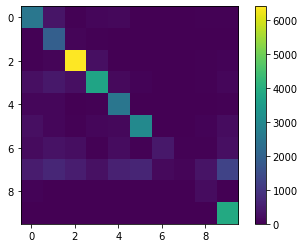

In [ ]:
plt.imshow(confusion_matrix)
plt.colorbar(orientation='vertical')
plt.show()

# Writing requested files

In [ ]:
c5 = Corpus(X_train, replace_frequent=False, train = False, char = True)

In [ ]:
# Create words.txt
print('Writing words in a text file: Wait...')
with open('words.txt', 'w') as f:
    for word in c5.dictionary:
        string = word + '\n'
        f.write(string)
print('Writing words in a text file: Done!')

Writing words in a text file: Wait...
Writing words in a text file: Done!


In [ ]:
# Create chars.txt
print('Writing chars in a text file: Wait...')
with open('chars.txt', 'w') as f:
    for char in c5.dictionary_char:
        string = char + '\n'
        f.write(string)
print('Writing chars in a text file: Done!')

Writing chars in a text file: Wait...
Writing chars in a text file: Done!


In [ ]:
# Create most_frequent.txt
print('Writing words in a text file: Wait...')
with open('most_frequent.txt', 'w') as f:
    for word in c.most_frequent_words:
        string = word + '\n'
        f.write(string)
print('Writing words in a text file: Done!')

Writing words in a text file: Wait...
Writing words in a text file: Done!


In [ ]:
# Create .pickle files for each dictionary
import pickle

# word2index.pickle
with open('word2index.pickle', 'wb') as handle:
    pickle.dump(c.word2index, handle, protocol=pickle.HIGHEST_PROTOCOL)

# index2word.pickle
with open('index2word.pickle', 'wb') as handle:
    pickle.dump(c.index2word, handle, protocol=pickle.HIGHEST_PROTOCOL)

# char2index.pickle
with open('char2index.pickle', 'wb') as handle:
    pickle.dump(c5.char2index, handle, protocol=pickle.HIGHEST_PROTOCOL)

# index2char.pickle
with open('index2char.pickle', 'wb') as handle:
    pickle.dump(c5.index2char, handle, protocol=pickle.HIGHEST_PROTOCOL)
